In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [9]:
# The Dataset
# The make_moons() function is used in binary classification and 
# generates a swirl pattern that looks like two moons.
X, y = make_moons(n_samples = 500, noise = 0.1)
df = pd.DataFrame(X, y)
df = df.rename(columns = {0: 'X1', 1: 'X2'})
df.head()

,X1,X2
0,-0.178433,0.893149
1,1.755576,-0.277433
0,-1.111409,0.161546
1,1.453519,-0.410988
0,0.155072,1.107822


Text(0, 0.5, '$x_2$')

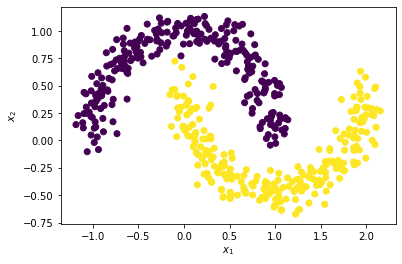

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = y, label = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


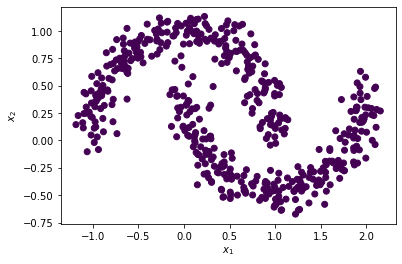

In [11]:
# Applying Sklearn DBSCAN Clustering with default parameters
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c = dbscan_cluster1.labels_, label = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Number of Clusters
labels = dbscan_cluster1.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 13
Estimated no. of noise points: 113
v_measure = 0.3453529262670551


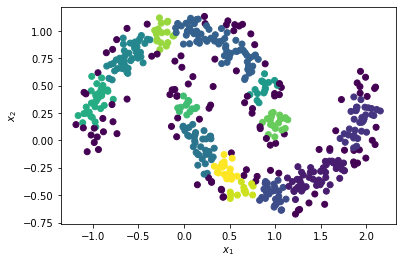

In [35]:
# Applying DBSCAN with eps = 0.1 and min_samples = 8
dbscan_cluster = DBSCAN(eps = 0.1, min_samples = 8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c = dbscan_cluster.labels_, label = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, 'Distance')

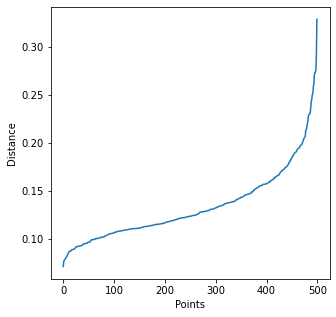

In [25]:
# Finding the Optimal value of Epsilon
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors = 11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:, 10], axis = 0)

fig = plt.figure(figsize = (5, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')

0.17049184580688964


<Figure size 360x360 with 0 Axes>

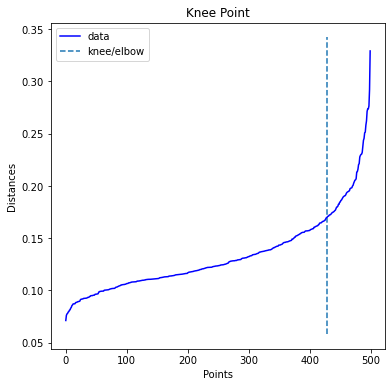

In [29]:
# Identifying Elbow Point with Kneed Package
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S = 1, curve = 'convex', 
                   direction = 'increasing', interp_method = 'polynomial')

fig = plt.figure(figsize = (5, 5))
knee.plot_knee()
plt.xlabel('Points')
plt.ylabel('Distances')

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 1
v_measure = 0.9720458548811634


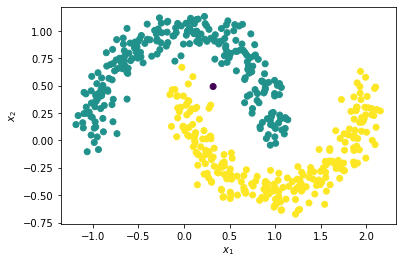

In [33]:
# Applying DBSCAN with Optimal value of Epsilon = 0.17049184580688964
dbscan_cluster = DBSCAN(eps = 0.17049184580688964, min_samples = 8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c = dbscan_cluster.labels_, label = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))